## Introduction to GeoPandas

In this tutorial we download real data from NYC open data through API and analyse the data in Pandas. We cover the basic Pandas functions, visualize data and make small assignment in pairs.

Before we start import necessary packages

In [2]:
import geopandas as gpd

/home/mtopnikov/.local/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Pandas introduces two new data structures to Python - GeoSeries and GeoDataFrame, both of which are almost the same as Series and DataFrame in Pandas. But with geometry.

#### GeoDataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with DataFrames.

#### GeoSeries
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

Using pandas we will explore the dataset from NYC Open data about Service Requests. This dataset is quite big since the information about complaints has stored since 2010. Data can be dowloaded from [NYC open data](https://data.cityofnewyork.us/Social-Services/311/wpe2-h2i5). For our analysis we will consider small already prepared subset of this data starting from 2015 year.

 # Check / rewrite everything above for GeoPandas

How did we get the file we worked with in Pandas? Let's prepare it together.

First, let's import geopandas and give it a handy alias so that we don't always need to write geopandas, instead writing gpd. This saves a lot of time.

In [5]:
osm_poi = gpd.read_file('amenities-osm-overpass-MSK-3rd-ring.geojson')
osm_poi.head()

,id,@id,addr:housenumber,addr:postcode,addr:street,amenity,building,building:levels,building:material,contact:email,...,recycling:glass_cans,recycling:glass_cans:description,recycling:paper:description,recycling:plastic_bottle_caps,recycling:plastic_bottle_caps:description,recycling:scrap_metal:description,website:recycling:fractions,telegram,name:signed,geometry
0,relation/55214,relation/55214,1,109240,Николоямская улица,library,public,8,brick,spravka@libfl.ru,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.64752 55.74872, 37.64751 55.74869..."
1,relation/85639,relation/85639,13,125009,Тверская улица,townhall,office,5,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.60935 55.76136, 37.60929 55.76141..."
2,relation/85762,relation/85762,1,None,Театральный проезд,theatre,yes,3,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.62044 55.75941, 37.62038 55.75940..."
3,relation/86444,relation/86444,13,None,Цветной бульвар,theatre,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.61921 55.77084, 37.61921 55.77037..."
4,relation/92987,relation/92987,2 с1,None,улица Красина,clinic,clinic,6,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.58975 55.76667, 37.58958 55.76680..."


In [4]:
osm_poi.columns

Index(['id', '@id', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'amenity', 'building', 'building:levels', 'building:material',
       'contact:email',
       ...
       'recycling:glass_cans', 'recycling:glass_cans:description',
       'recycling:paper:description', 'recycling:plastic_bottle_caps',
       'recycling:plastic_bottle_caps:description',
       'recycling:scrap_metal:description', 'website:recycling:fractions',
       'telegram', 'name:signed', 'geometry'],
      dtype='object', length=620)

In [11]:
osm_poi['type'].unique()

array(['multipolygon', None], dtype=object)

In [6]:
osm_poi_points = osm_poi[osm_poi['geometry'].type == 'Point'].reset_index()
osm_poi_points.head()

,index,id,@id,addr:housenumber,addr:postcode,addr:street,amenity,building,building:levels,building:material,...,recycling:glass_cans,recycling:glass_cans:description,recycling:paper:description,recycling:plastic_bottle_caps,recycling:plastic_bottle_caps:description,recycling:scrap_metal:description,website:recycling:fractions,telegram,name:signed,geometry
0,2335,node/253721996,node/253721996,None,None,None,clock,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (37.63959 55.72998)
1,2336,node/255742562,node/255742562,None,None,None,pub,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (37.58010 55.75927)
2,2337,node/255742645,node/255742645,None,None,None,pub,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (37.63898 55.76559)
3,2338,node/267336195,node/267336195,None,None,None,fast_food,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (37.63207 55.76080)
4,2339,node/272607919,node/272607919,None,None,None,fuel,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (37.65831 55.75082)


In [26]:
osm_poi_points.to_csv('osm_poi_points_moscow.csv', index=False)

Wow, that wasn't that hard, but not too easy too, right? 

We could have done it in QGIS also, you probably though about this too. But Python is faster and saves time, even though it's not as graphical as QGIS. 

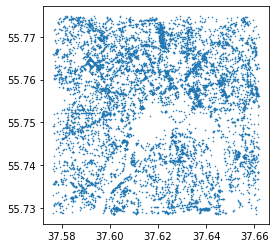

In [9]:
osm_poi_points.plot(markersize = .3)

# Geometry opertions

There are three basic geometry types: point, line and polygon

In [13]:
from shapely.geometry import Point, LineString, Polygon

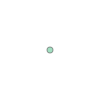

In [14]:
Point(0, 0)

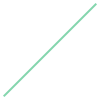

In [16]:
LineString([(0, 0), (1, 1)])

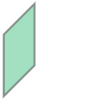

In [44]:
Polygon([(0, 0), (1, 1), (1, -1), (0, -2)])

In a nutshell:
- a Point is the most basic geom. type (a pair of coords -- lon, lat / x, y)
- a Line is the set of points without the space within the points envelope
- a Polygon is the set of points with the space within the envelope

Also some more advanced features are represented in SimpleFeatures format:

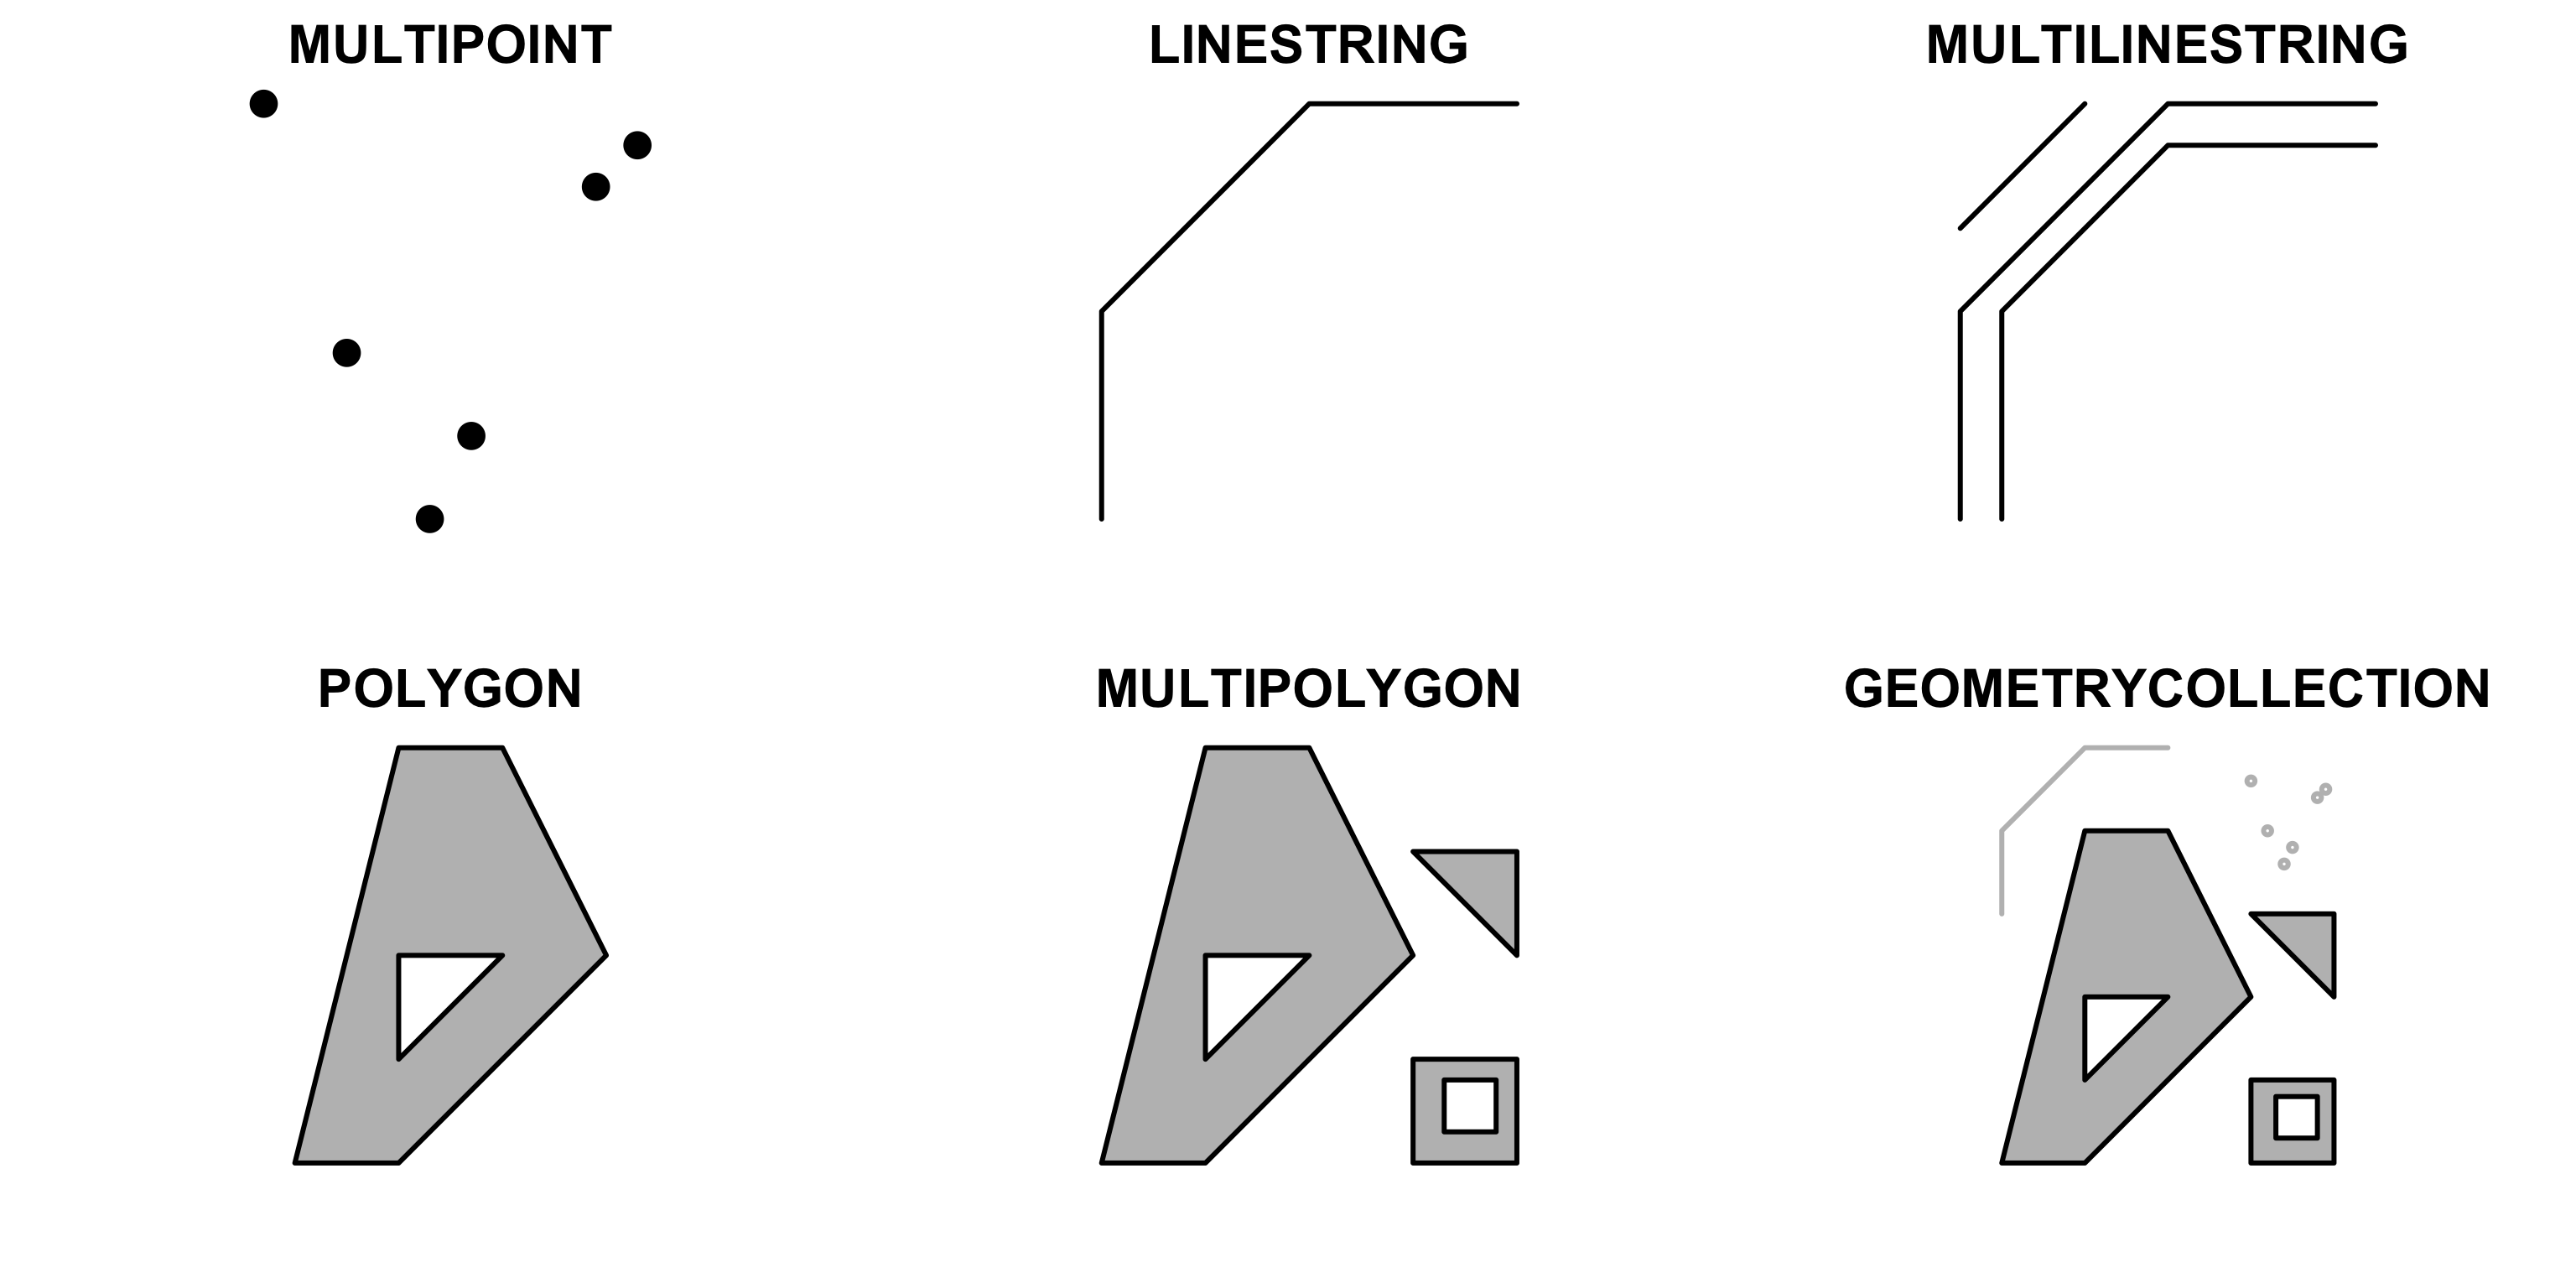

The features are represented in the format of **Well-Known Text (or WKT for short)**:

In [22]:
osm_poi.geometry

0        POLYGON ((415105.138 6178941.757, 415104.698 6...
1        POLYGON ((412737.384 6180395.898, 412734.146 6...
2        POLYGON ((413429.239 6180164.739, 413425.135 6...
3        POLYGON ((413377.610 6181438.082, 413376.487 6...
4        POLYGON ((411519.594 6181011.275, 411509.770 6...
                               ...                        
11628                       POINT (414448.844 6180623.678)
11629                       POINT (414480.395 6180646.235)
11630                       POINT (414516.853 6180594.409)
11631                       POINT (414502.091 6180675.176)
11632                       POINT (415593.609 6179572.795)
Name: geometry, Length: 11633, dtype: geometry

Lets see, how do we modify geometry.
First to correctly сompute distances we should reproject our data:

In [51]:
osm_poi_points = osm_poi.to_crs(epsg = 32637) # using Moscow local UTM CRS (Northern hemisphere zone 37)

## Centroid

A **centroid** or *geometric center* of a plane figure is the arithmetic mean position of all the points in the figure

`centroid` function of Geopandas can be called to perform computation of centroids

In [52]:
osm_poi.geometry.centroid

0        POINT (415146.613 6178920.681)
1        POINT (412693.648 6180384.028)
2        POINT (413440.278 6180203.691)
3        POINT (413419.961 6181402.257)
4        POINT (411499.334 6181029.679)
                      ...              
11628    POINT (414448.844 6180623.678)
11629    POINT (414480.395 6180646.235)
11630    POINT (414516.853 6180594.409)
11631    POINT (414502.091 6180675.176)
11632    POINT (415593.609 6179572.795)
Length: 11633, dtype: geometry

See, now applying `centroid` helped us to ret rid of multiple geometries in a `geometry` column. Let's apply this to a dataframe

In [53]:
osm_poi['geometry'] = osm_poi.geometry.centroid

## Buffer

A polygon representing all points within a given distance of each geometric object.

In [54]:
osm_poi_points.geometry.buffer(300) #300 m buffer

0        POLYGON ((415446.613 6178920.681, 415445.169 6...
1        POLYGON ((412993.648 6180384.028, 412992.203 6...
2        POLYGON ((413740.278 6180203.691, 413738.833 6...
3        POLYGON ((413719.961 6181402.257, 413718.517 6...
4        POLYGON ((411799.334 6181029.679, 411797.890 6...
                               ...                        
11628    POLYGON ((414748.844 6180623.678, 414747.400 6...
11629    POLYGON ((414780.395 6180646.235, 414778.950 6...
11630    POLYGON ((414816.853 6180594.409, 414815.408 6...
11631    POLYGON ((414802.091 6180675.176, 414800.646 6...
11632    POLYGON ((415893.609 6179572.795, 415892.164 6...
Length: 11633, dtype: geometry

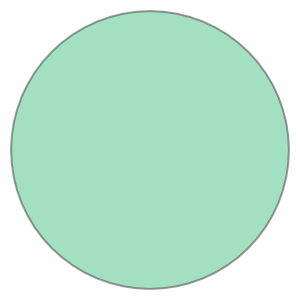

In [55]:
osm_poi_points.loc[1, 'geometry'].buffer(300)

## Convex hull

smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three

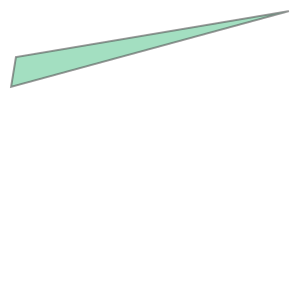

In [56]:
osm_poi_points.geometry.unary_union.convex_hull

Convex hull is a special case of concave hull. Concave hulls are used to build isochrones

# Aggregated data

So OSM points was a standalone Point layer. When we work with cities, especially here at Habidatum, we use aggregations to buld privacy-compliant data that also goes well with telco data, that is usualy sent via grid level.

Our teammates probably told you already about our philosophy of data/data format - Chronotope Grid and a visualization product we built for such data - Chronotope Dashboard.

So let's work with a file that has different kinds of data aggregated first by districts and then by grid. 

In [37]:
grek_district = gpd.read_file('hbd_grek_covid_districts_v12_tass.geojson')
grek_district.head()

,fid,sundextPRC,Mean_eleva,Mean_yards,Ya_Involve,density_ordinary,density_quarantine,delta_density_abs,delta_density_rel,diversity_ordinary,...,YA_6APR,YA_20APR,food_variety_w_time,food_variety_88min,food_delivery_access,YA_27APR,YA_4MAY,people_per_pharmacy,people_per_100m2_food_store,geometry
0,1,20.16,46.33,204.99,0.915445,4.989791,2.290887,2.698904,56.128056,0.127271,...,0.739504,1.379474,310.0,194.0,250.5625,1.718835,0.915445,3661.794888,626.179362,"MULTIPOLYGON (((37.54950 55.80705, 37.54983 55..."
1,2,19.39,60.82,144.46,1.699159,3.840729,1.557858,2.282871,62.551273,0.078008,...,0.825553,1.318956,229.0,110.0,104.2500,1.799920,1.699159,4800.343663,625.581870,"MULTIPOLYGON (((37.80862 55.76024, 37.80931 55..."
2,3,21.76,77.88,126.06,1.408925,3.988516,1.452977,2.535539,60.008617,0.042404,...,0.954445,1.108976,244.0,130.0,122.8750,1.620434,1.408925,4909.706762,521.815887,"MULTIPOLYGON (((37.62181 55.69072, 37.62189 55..."
3,4,16.49,67.50,111.16,1.486634,1.949343,0.787601,1.161742,56.361064,0.040512,...,1.529912,1.152712,200.0,91.0,72.6250,2.201873,1.486634,6810.299763,992.973041,"MULTIPOLYGON (((37.68691 55.63639, 37.68563 55..."
4,5,6.28,34.98,150.88,1.408063,3.988817,1.664461,2.324356,62.908971,0.058888,...,1.481736,1.346838,281.0,158.0,180.6250,1.646414,1.408063,4399.420313,664.967501,"MULTIPOLYGON (((37.55222 55.68404, 37.55240 55..."


In [45]:
grek_district[['fid', 'geometry']].to_file('hbd_grek_covid_districts_clean.geojson', driver = 'GeoJSON')

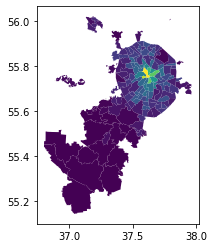

In [36]:
grek_district.plot(column = 'density_ordinary')

In [38]:
grek_grid = gpd.read_file('hbd_grek_covid_grid_v12_tass.geojson')
grek_grid.head()

,fid,areal_cent_percent,Mean_yards,Mean_eleva,Ya_Involve,density_ordinary,density_quarantine,delta_density_abs,delta_density_rel,diversity_ordinary,...,delta_diversity_rel,Pop_dens,sundextPRC,food_variety_w_time,food_variety_88min,food_deliv_access,nodeId,people_per_pharmacy,people_per_100m2_food_store,geometry
0,1,5.769,NaN,NaN,0.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.657722e+18,NaN,NaN,"MULTIPOLYGON (((37.33154 55.69616, 37.33704 55..."
1,2,10.448,NaN,NaN,0.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.657722e+18,NaN,NaN,"MULTIPOLYGON (((37.33704 55.69616, 37.34253 55..."
2,3,35.983,47.349811,87.095705,1.10,41.0,20.0,21.0,51.219512,16.0,...,56.250000,0.056,33.19,137.0,67.0,40.00,2.657723e+18,6150.581516,502.616233,"MULTIPOLYGON (((37.34253 55.63730, 37.34802 55..."
3,4,32.409,NaN,NaN,1.10,2.0,0.0,2.0,100.000000,1.0,...,100.000000,0.000,NaN,116.0,60.0,30.25,2.657723e+18,NaN,NaN,"MULTIPOLYGON (((37.34253 55.63420, 37.34802 55..."
4,5,47.752,44.539929,103.764706,1.10,155.0,66.0,89.0,57.419355,22.0,...,54.545455,0.010,56.48,124.0,65.0,34.50,2.657723e+18,6822.388302,718.035763,"MULTIPOLYGON (((37.34802 55.63730, 37.35352 55..."


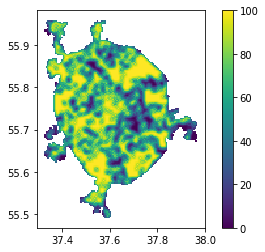

In [40]:
grek_grid.plot(column = 'areal_cent_percent', legend = True)

Lets try to combine our points data from OSM with the Grid

# Grid Aggregation

We will implement this using `gpd.sjoin()` function

Both files should be in the same crs

```{python}
gpd.sjoin(
    left_df, 
    right_df,
    how='inner', # what should be left (intersecting features as default)
    op='intersects', # spatial relationship type
    lsuffix='left',
    rsuffix='right',
)
```

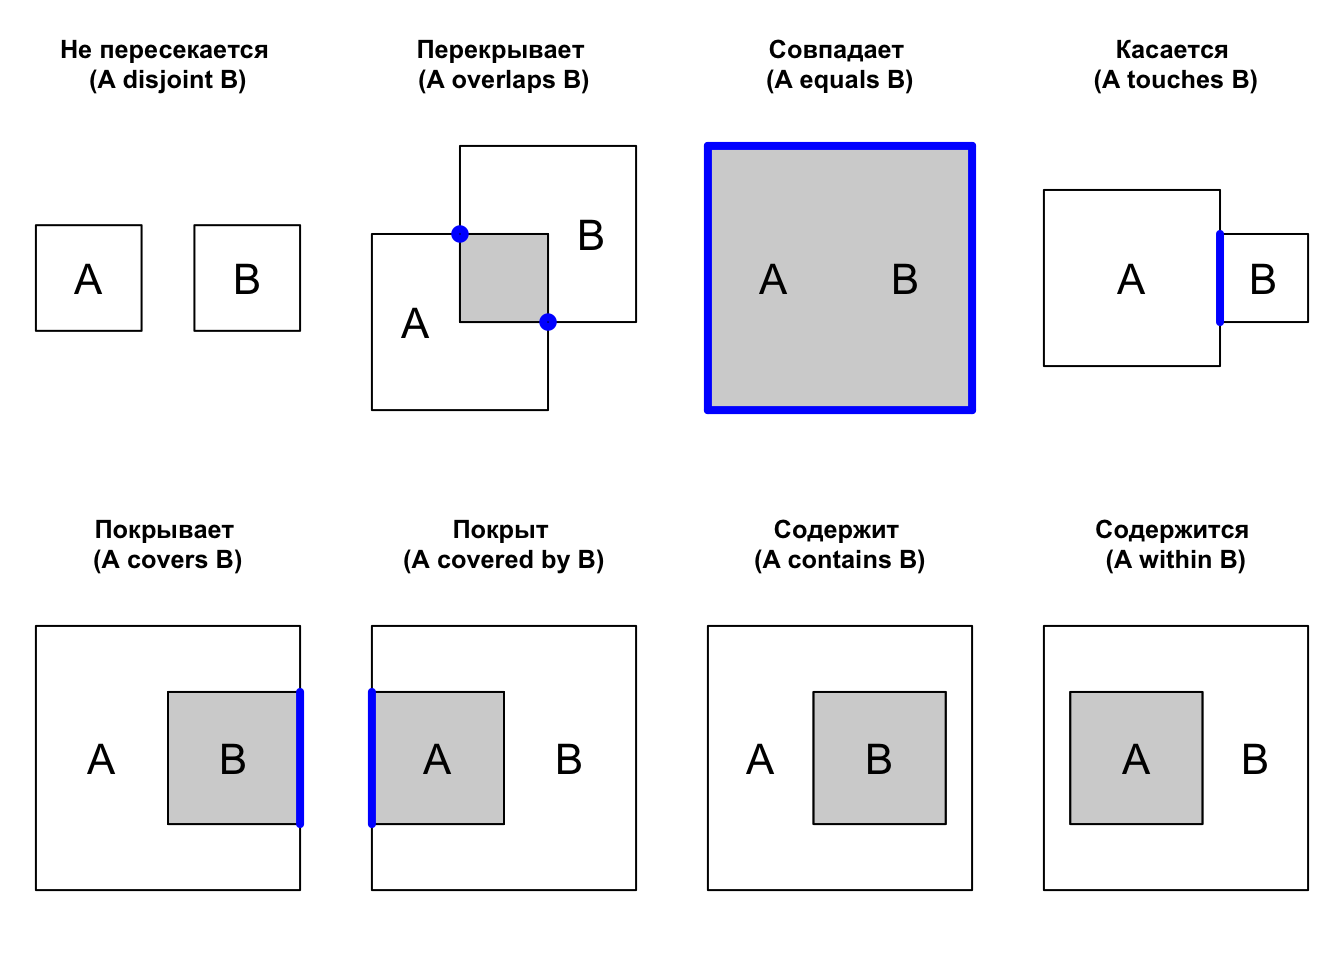

In [47]:
grek_grid = gpd.read_file('hbd_grek_covid_grid_clean.geojson')

In [48]:
grek_grid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
osm_poi_points.crs

<Projected CRS: EPSG:32637>
Name: WGS 84 / UTM zone 37N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 36°E to 42°E - by country
- bounds: (36.0, 0.0, 42.0, 84.0)
Coordinate Operation:
- name: UTM zone 37N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
grek_grid.crs == osm_poi_points.crs # Check if  crses are the same

False

In [59]:
osm_poi_points = osm_poi_points.to_crs(grek_grid.crs)

In [60]:
grek_grid.crs == osm_poi_points.crs # Check if  crses are the same

True

In [62]:
joined = gpd.sjoin(grek_grid, osm_poi_points, how = 'inner', op = 'intersects')
joined.head()

,fid,geometry,index_right,id,@id,addr:housenumber,addr:postcode,addr:street,amenity,building,...,recycling:code:6,recycling:glass_cans,recycling:glass_cans:description,recycling:paper:description,recycling:plastic_bottle_caps,recycling:plastic_bottle_caps:description,recycling:scrap_metal:description,website:recycling:fractions,telegram,name:signed
1917,1918,"MULTIPOLYGON (((37.47986 55.66519, 37.48535 55...",77,relation/2801700,relation/2801700,None,None,None,university,None,...,None,None,None,None,None,None,None,None,None,None
2584,2585,"MULTIPOLYGON (((37.51282 55.80128, 37.51831 55...",79,relation/2817424,relation/2817424,None,None,None,university,None,...,None,None,None,None,None,None,None,None,None,None
2941,2942,"MULTIPOLYGON (((37.52930 55.70545, 37.53479 55...",76,relation/2800169,relation/2800169,None,None,None,university,None,...,None,None,None,None,None,None,None,None,None,None
3073,3074,"MULTIPOLYGON (((37.54028 55.79819, 37.54578 55...",73,relation/2798634,relation/2798634,None,None,None,university,None,...,None,None,None,None,None,None,None,None,None,None
4005,4006,"MULTIPOLYGON (((37.57324 55.73020, 37.57874 55...",2866,node/1720327000,node/1720327000,None,None,None,bench,None,...,None,None,None,None,None,None,None,None,None,None


Let's count how many POIs are in grid cells

In [65]:
joined = joined.groupby('fid', as_index = False)['id'].nunique()

In [66]:
grek_grid = grek_grid.merge(joined, on = 'fid')

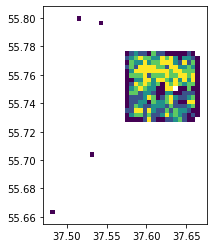

In [71]:
grek_grid.plot(column = 'id', scheme = 'quantiles')